<a href="https://colab.research.google.com/github/Voidspaceinuniverse/Project/blob/main/Write.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [ ]:
pip install --upgrade git+https://github.com/scikit-learn-contrib/category_encoders -q

  Preparing metadata (setup.py) ... done


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, ADASYN
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score
from category_encoders import TargetEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Label Encoder

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = LabelEncoder()

X_train['job'] = encode_model.fit_transform(X_train['job'])
X_train['marital'] = encode_model.fit_transform(X_train['marital'])
X_train['education'] = encode_model.fit_transform(X_train['education'])
#X_train['default'] = encode_model.fit_transform(X_train['default'])
X_train['housing'] = encode_model.fit_transform(X_train['housing'])
X_train['loan'] = encode_model.fit_transform(X_train['loan'])
X_train['contact'] = encode_model.fit_transform(X_train['contact'])
X_train['month'] = encode_model.fit_transform(X_train['month'])
X_train['day_of_week'] = encode_model.fit_transform(X_train['day_of_week'])
X_train['poutcome'] = encode_model.fit_transform(X_train['poutcome'])

X_val['job'] = encode_model.fit_transform(X_val['job'])
X_val['marital'] = encode_model.fit_transform(X_val['marital'])
X_val['education'] = encode_model.fit_transform(X_val['education'])
#X_val['default'] = encode_model.fit_transform(X_val['default'])
X_val['housing'] = encode_model.fit_transform(X_val['housing'])
X_val['loan'] = encode_model.fit_transform(X_val['loan'])
X_val['contact'] = encode_model.fit_transform(X_val['contact'])
X_val['month'] = encode_model.fit_transform(X_val['month'])
X_val['day_of_week'] = encode_model.fit_transform(X_val['day_of_week'])
X_val['poutcome'] = encode_model.fit_transform(X_val['poutcome'])

In [ ]:
%%time
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6273350943784817 0.017098125916063214
LinearDiscriminantAnalysis 0.6799683921961358 0.017036505752513604
KNeighborsClassifier 0.6377198589817813 0.012516472074686357
Gaussian Naive Bayes 0.648556752112724 0.012867026257525697
DecisionTreeClassifier 0.614416611497923 0.012681509568944075
AdaBoostClassifier 0.6317049765183793 0.008720559092249206
GradientBoostingClassifier 0.6500811793011991 0.014264467108088147
RandomForestClassifier 0.660999215669626 0.01093986668652378
ExtraTreesClassifier 0.6574719169107154 0.014772950453466193
XGBClassifier 0.6649445821079336 0.012382646249273436
QuadraticDiscriminantAnalysis 0.6954199577656623 0.012320082367641937
MLPClassifier 0.605737198567097 0.0911626908129128
CPU times: user 2min 32s, sys: 16.7 s, total: 2min 49s
Wall time: 2min 18s


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Label_Encoder_tab = date.sort_values(by='f1_macro', ascending=False)
LE_sum = Label_Encoder_tab[['f1_macro', 'std']].agg({'sum', 'mean'})
Label_Encoder_tab

,f1_macro,std
QuadraticDiscriminantAnalysis,0.695420,0.012320
LinearDiscriminantAnalysis,0.679968,0.017037
XGBClassifier,0.664945,0.012383
RandomForestClassifier,0.660999,0.010940
ExtraTreesClassifier,0.657472,0.014773
GradientBoostingClassifier,0.650081,0.014264
Gaussian Naive Bayes,0.648557,0.012867
KNeighborsClassifier,0.637720,0.012516
AdaBoostClassifier,0.631705,0.008721
LogisticRegression,0.627335,0.017098


In [ ]:
LE_sum

,f1_macro,std
sum,7.774356,0.236763
mean,0.647863,0.019730


#Label Encoder Standart

In [ ]:
%%time
model = StandardScaler()
X_train_StSc = model.fit_transform(X_train)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_StSc, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6339708996738949 0.015457174086074417
LinearDiscriminantAnalysis 0.6799683921961358 0.017036505752513604
KNeighborsClassifier 0.650612023210157 0.010398635865988258
Gaussian Naive Bayes 0.648556752112724 0.012867026257525697
DecisionTreeClassifier 0.6135209234610045 0.013740501902161988
AdaBoostClassifier 0.6317049765183793 0.008720559092249206
GradientBoostingClassifier 0.6502840965536918 0.013856482813616153
RandomForestClassifier 0.6607438172364404 0.012108297288857352
ExtraTreesClassifier 0.6575279096765294 0.013893597971521702
XGBClassifier 0.6649445821079336 0.012382646249273436
QuadraticDiscriminantAnalysis 0.6954199577656623 0.012320082367641937


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPClassifier 0.6568839821052551 0.017984077383389585
CPU times: user 6min 23s, sys: 2min 49s, total: 9min 13s
Wall time: 5min 52s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Label_Encoder_tab_scale = date.sort_values(by='f1_macro', ascending=False)
LE_sum_scale = Label_Encoder_tab_scale[['f1_macro', 'std']].agg({'sum', 'mean'})
Label_Encoder_tab_scale

,f1_macro,std
QuadraticDiscriminantAnalysis,0.695420,0.012320
LinearDiscriminantAnalysis,0.679968,0.017037
XGBClassifier,0.664945,0.012383
RandomForestClassifier,0.660744,0.012108
ExtraTreesClassifier,0.657528,0.013894
MLPClassifier,0.656884,0.017984
KNeighborsClassifier,0.650612,0.010399
GradientBoostingClassifier,0.650284,0.013856
Gaussian Naive Bayes,0.648557,0.012867
LogisticRegression,0.633971,0.015457


In [ ]:
LE_sum_scale

,f1_macro,std
sum,7.844138,0.160766
mean,0.653678,0.013397


In [ ]:
%%time
model = MinMaxScaler()
X_train_MMSc = model.fit_transform(X_train)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_MMSc, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6333219896642708 0.013863581504310172
LinearDiscriminantAnalysis 0.6799683921961358 0.017036505752513604
KNeighborsClassifier 0.6467437663475348 0.014265868515861757
Gaussian Naive Bayes 0.648556752112724 0.012867026257525697
DecisionTreeClassifier 0.6120596188109235 0.010756528543592828
AdaBoostClassifier 0.6317049765183793 0.008720559092249206
GradientBoostingClassifier 0.6500811793011991 0.014264467108088147
RandomForestClassifier 0.6625688874328262 0.00960577773714788
ExtraTreesClassifier 0.6582211444140771 0.013525070746808912
XGBClassifier 0.6646166092536664 0.012535637923420663
QuadraticDiscriminantAnalysis 0.6954199577656623 0.012320082367641937


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPClassifier 0.6606388445249163 0.012593477251466544
CPU times: user 5min 50s, sys: 2min 19s, total: 8min 9s
Wall time: 5min 14s


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Label_Encoder_tab_norm = date.sort_values(by='f1_macro', ascending=False)
LE_sum_norm = Label_Encoder_tab_norm[['f1_macro', 'std']].agg({'sum', 'mean'})
Label_Encoder_tab_norm

,f1_macro,std
QuadraticDiscriminantAnalysis,0.695420,0.012320
LinearDiscriminantAnalysis,0.679968,0.017037
XGBClassifier,0.664617,0.012536
RandomForestClassifier,0.662569,0.009606
MLPClassifier,0.660639,0.012593
ExtraTreesClassifier,0.658221,0.013525
GradientBoostingClassifier,0.650081,0.014264
Gaussian Naive Bayes,0.648557,0.012867
KNeighborsClassifier,0.646744,0.014266
LogisticRegression,0.633322,0.013864


In [ ]:
LE_sum_norm

,f1_macro,std
sum,7.843902,0.152355
mean,0.653659,0.012696


#Target Encoder

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)


In [ ]:
%%time
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.609695071478946 0.020395845330121308
LinearDiscriminantAnalysis 0.677485389541652 0.012556840474689999
KNeighborsClassifier 0.6355252956043584 0.007656362129219792
Gaussian Naive Bayes 0.6852022306056871 0.013181584487405395
DecisionTreeClassifier 0.6153128498510895 0.009550414097829737
AdaBoostClassifier 0.6341532808091435 0.015104179421716086
GradientBoostingClassifier 0.6489132396608135 0.010246680208397158
RandomForestClassifier 0.6624871371219079 0.01588417295147436
ExtraTreesClassifier 0.6555828641787727 0.01491301890055264
XGBClassifier 0.6629007897624376 0.009042173591472042
QuadraticDiscriminantAnalysis 0.7027916007920225 0.012938355798898396
MLPClassifier 0.5589926793786631 0.09513419633522018
CPU times: user 2min 25s, sys: 13.8 s, total: 2min 39s
Wall time: 2min 5s


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Target_Encoder_tab = date.sort_values(by='f1_macro', ascending=False)
TE_sum = Target_Encoder_tab[['f1_macro', 'std']].agg({'sum', 'mean'})
Target_Encoder_tab

,f1_macro,std
QuadraticDiscriminantAnalysis,0.702792,0.012938
Gaussian Naive Bayes,0.685202,0.013182
LinearDiscriminantAnalysis,0.677485,0.012557
XGBClassifier,0.662901,0.009042
RandomForestClassifier,0.662487,0.015884
ExtraTreesClassifier,0.655583,0.014913
GradientBoostingClassifier,0.648913,0.010247
KNeighborsClassifier,0.635525,0.007656
AdaBoostClassifier,0.634153,0.015104
DecisionTreeClassifier,0.615313,0.009550


In [ ]:
TE_sum

,f1_macro,std
sum,7.749042,0.236604
mean,0.645754,0.019717


#Target Encoder Standart

In [ ]:
%%time
model = StandardScaler()
X_train_StSc = model.fit_transform(X_train)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_StSc, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6413921169729986 0.012863050217135472
LinearDiscriminantAnalysis 0.677485389541652 0.012556840474689999
KNeighborsClassifier 0.6576612255308742 0.006222549662403713
Gaussian Naive Bayes 0.685117755612724 0.01349899170493165
DecisionTreeClassifier 0.6146465759692173 0.0077803700150120775
AdaBoostClassifier 0.6341532808091435 0.015104179421716086
GradientBoostingClassifier 0.6487389106762809 0.010035764744205035
RandomForestClassifier 0.6615349988251531 0.01173732899770297
ExtraTreesClassifier 0.6586475853316579 0.01642015198295482
XGBClassifier 0.6629007897624376 0.009042173591472042
QuadraticDiscriminantAnalysis 0.7027916007920225 0.012938355798898396


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPClassifier 0.6524175673655825 0.013346383051687519
CPU times: user 6min 23s, sys: 2min 49s, total: 9min 13s
Wall time: 5min 57s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Target_Encoder_tab_scale = date.sort_values(by='f1_macro', ascending=False)
TE_sum_scale = Target_Encoder_tab_scale[['f1_macro', 'std']].agg({'sum', 'mean'})
Target_Encoder_tab_scale

,f1_macro,std
QuadraticDiscriminantAnalysis,0.702792,0.012938
Gaussian Naive Bayes,0.685118,0.013499
LinearDiscriminantAnalysis,0.677485,0.012557
XGBClassifier,0.662901,0.009042
RandomForestClassifier,0.661535,0.011737
ExtraTreesClassifier,0.658648,0.016420
KNeighborsClassifier,0.657661,0.006223
MLPClassifier,0.652418,0.013346
GradientBoostingClassifier,0.648739,0.010036
LogisticRegression,0.641392,0.012863


In [ ]:
TE_sum_scale

,f1_macro,std
sum,7.897488,0.141546
mean,0.658124,0.011796


In [ ]:
%%time
model = MinMaxScaler()
X_train_MMSc = model.fit_transform(X_train)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_MMSc, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6411942772103328 0.013249806445309263
LinearDiscriminantAnalysis 0.677485389541652 0.012556840474689999
KNeighborsClassifier 0.6487219402374673 0.015682726560322796
Gaussian Naive Bayes 0.685117755612724 0.01349899170493165
DecisionTreeClassifier 0.6167136929985104 0.00847935275963172
AdaBoostClassifier 0.6341532808091435 0.015104179421716086
GradientBoostingClassifier 0.6489612582521462 0.010230124318590413
RandomForestClassifier 0.6616908526445978 0.011496939914808277
ExtraTreesClassifier 0.655450469944755 0.015862280313679093
XGBClassifier 0.6629007897624376 0.009042173591472042
QuadraticDiscriminantAnalysis 0.7027916007920225 0.012938355798898396


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier 0.6568036495654405 0.02170751155060433
CPU times: user 5min 15s, sys: 2min, total: 7min 15s
Wall time: 4min 43s


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Target_Encoder_tab_norm = date.sort_values(by='f1_macro', ascending=False)
TE_sum_norm = Target_Encoder_tab_norm[['f1_macro', 'std']].agg({'sum', 'mean'})
Target_Encoder_tab_norm

,f1_macro,std
QuadraticDiscriminantAnalysis,0.702792,0.012938
Gaussian Naive Bayes,0.685118,0.013499
LinearDiscriminantAnalysis,0.677485,0.012557
XGBClassifier,0.662901,0.009042
RandomForestClassifier,0.661691,0.011497
MLPClassifier,0.656804,0.021708
ExtraTreesClassifier,0.655450,0.015862
GradientBoostingClassifier,0.648961,0.010230
KNeighborsClassifier,0.648722,0.015683
LogisticRegression,0.641194,0.013250


In [ ]:
TE_sum_norm

,f1_macro,std
sum,7.891985,0.159849
mean,0.657665,0.013321


#GetDum

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first= True )
X_val = pd.get_dummies(X_val, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first= True )

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)


In [ ]:
%%time
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6249313466323526 0.013088671425604175
LinearDiscriminantAnalysis 0.6835926342310493 0.015897053133986414
KNeighborsClassifier 0.6391698240565565 0.011507820519520592
Gaussian Naive Bayes 0.6783058849339019 0.011447693298582563
DecisionTreeClassifier 0.615392305741775 0.00783126619700192
AdaBoostClassifier 0.635148597453003 0.015402673145080883
GradientBoostingClassifier 0.6488172051841679 0.013063892894325321
RandomForestClassifier 0.6587654004186635 0.015192903816766922
ExtraTreesClassifier 0.6524181732427176 0.01540154703091853
XGBClassifier 0.6648047835920635 0.011600620662825356


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QuadraticDiscriminantAnalysis 0.694815797716086 0.011374191693281285
MLPClassifier 0.5306490861655532 0.09397178044742839
CPU times: user 3min 42s, sys: 20.7 s, total: 4min 3s
Wall time: 3min 1s


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Get_Dum_tab = date.sort_values(by='f1_macro', ascending=False)
GD_sum = Get_Dum_tab[['f1_macro', 'std']].agg({'sum', 'mean'})
Get_Dum_tab

,f1_macro,std
QuadraticDiscriminantAnalysis,0.694816,0.011374
LinearDiscriminantAnalysis,0.683593,0.015897
Gaussian Naive Bayes,0.678306,0.011448
XGBClassifier,0.664805,0.011601
RandomForestClassifier,0.658765,0.015193
ExtraTreesClassifier,0.652418,0.015402
GradientBoostingClassifier,0.648817,0.013064
KNeighborsClassifier,0.639170,0.011508
AdaBoostClassifier,0.635149,0.015403
LogisticRegression,0.624931,0.013089


In [ ]:
new = pd.concat([pd.DataFrame(LE_sum), pd.DataFrame(TE_sum), pd.DataFrame(GD_sum)])
new = new.reset_index()
new = new.rename(index={ 0:'Label Encoder Sum',1:'Label Encoder Mean',2:'Traget Encoder Sum',3:'Traget Encoder Mean',4:'Get Dummies Sum',5:'Get Dummies Mean' })
new = new.drop(['index'], axis=1)
new = new.loc[['Label Encoder Mean','Traget Encoder Mean','Get Dummies Mean']]
new

,f1_macro,std
Label Encoder Mean,0.647863,0.019730
Traget Encoder Mean,0.645754,0.019717
Get Dummies Mean,0.643901,0.019648


In [ ]:
Label_Encoder_tab, Target_Encoder_tab, Get_Dum_tab

(                               f1_macro       std
 QuadraticDiscriminantAnalysis  0.695420  0.012320
 LinearDiscriminantAnalysis     0.679968  0.017037
 XGBClassifier                  0.664945  0.012383
 RandomForestClassifier         0.660999  0.010940
 ExtraTreesClassifier           0.657472  0.014773
 GradientBoostingClassifier     0.650081  0.014264
 Gaussian Naive Bayes           0.648557  0.012867
 KNeighborsClassifier           0.637720  0.012516
 AdaBoostClassifier             0.631705  0.008721
 LogisticRegression             0.627335  0.017098
 DecisionTreeClassifier         0.614417  0.012682
 MLPClassifier                  0.605737  0.091163,
                                f1_macro       std
 QuadraticDiscriminantAnalysis  0.702792  0.012938
 Gaussian Naive Bayes           0.685202  0.013182
 LinearDiscriminantAnalysis     0.677485  0.012557
 XGBClassifier                  0.662901  0.009042
 RandomForestClassifier         0.662487  0.015884
 ExtraTreesClassifier         

#GetDum Standart

In [ ]:
%%time
model = StandardScaler()
X_train_StSc = model.fit_transform(X_train)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_StSc, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6425861625152622 0.016051904617180215
LinearDiscriminantAnalysis 0.6835926342310493 0.015897053133986414
KNeighborsClassifier 0.6496711521238892 0.01289101049692187
Gaussian Naive Bayes 0.6783058849339019 0.011447693298582563
DecisionTreeClassifier 0.612694695684384 0.008806939567995884
AdaBoostClassifier 0.635148597453003 0.015402673145080883
GradientBoostingClassifier 0.6485758528463349 0.013325341941489021
RandomForestClassifier 0.6604402566783316 0.01395253587001505
ExtraTreesClassifier 0.6510393109233862 0.016402284192642537
XGBClassifier 0.6646350968263083 0.01160936692931542


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QuadraticDiscriminantAnalysis 0.6208270219857014 0.04806983282724935


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPClassifier 0.6458868736560758 0.010395190980142101
CPU times: user 8min 14s, sys: 2min 55s, total: 11min 9s
Wall time: 7min 6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Get_Dum_tab_scale = date.sort_values(by='f1_macro', ascending=False)
GD_sum_scale = Get_Dum_tab_scale[['f1_macro', 'std']].agg({'sum', 'mean'})
Get_Dum_tab_scale

,f1_macro,std
LinearDiscriminantAnalysis,0.683593,0.015897
Gaussian Naive Bayes,0.678306,0.011448
XGBClassifier,0.664635,0.011609
RandomForestClassifier,0.660440,0.013953
ExtraTreesClassifier,0.651039,0.016402
KNeighborsClassifier,0.649671,0.012891
GradientBoostingClassifier,0.648576,0.013325
MLPClassifier,0.645887,0.010395
LogisticRegression,0.642586,0.016052
AdaBoostClassifier,0.635149,0.015403


In [ ]:
GD_sum_scale

,f1_macro,std
sum,7.793404,0.194252
mean,0.649450,0.016188


In [ ]:
%%time
model = MinMaxScaler()
X_train_MMSc = model.fit_transform(X_train)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_MMSc, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6423014908340847 0.014891000733417667
LinearDiscriminantAnalysis 0.6835926342310493 0.015897053133986414
KNeighborsClassifier 0.6408618398198707 0.014104984400472918
Gaussian Naive Bayes 0.6783058849339019 0.011447693298582563
DecisionTreeClassifier 0.6153568797095202 0.007749887071105331
AdaBoostClassifier 0.635148597453003 0.015402673145080883
GradientBoostingClassifier 0.648619657447056 0.013242267624698665
RandomForestClassifier 0.6577908602485735 0.012992506251889527
ExtraTreesClassifier 0.6517874504406593 0.018534123683806032
XGBClassifier 0.6648047835920635 0.011600620662825356


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QuadraticDiscriminantAnalysis 0.6477064424800439 0.03757616704903938


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPClassifier 0.6566997641555046 0.01716062393531081
CPU times: user 8min 4s, sys: 2min 49s, total: 10min 54s
Wall time: 6min 58s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Get_Dum_tab_norm = date.sort_values(by='f1_macro', ascending=False)
GD_sum_norm = Get_Dum_tab_norm[['f1_macro', 'std']].agg({'sum', 'mean'})
Get_Dum_tab_norm

,f1_macro,std
LinearDiscriminantAnalysis,0.683593,0.015897
Gaussian Naive Bayes,0.678306,0.011448
XGBClassifier,0.664805,0.011601
RandomForestClassifier,0.657791,0.012993
MLPClassifier,0.656700,0.017161
ExtraTreesClassifier,0.651787,0.018534
GradientBoostingClassifier,0.648620,0.013242
QuadraticDiscriminantAnalysis,0.647706,0.037576
LogisticRegression,0.642301,0.014891
KNeighborsClassifier,0.640862,0.014105


In [ ]:
GD_sum_norm

,f1_macro,std
sum,7.822976,0.190600
mean,0.651915,0.015883


#Result

In [ ]:
Get_Dum_tab_scale, Get_Dum_tab_norm, Target_Encoder_tab_scale, Target_Encoder_tab_norm, Label_Encoder_tab_scale, Label_Encoder_tab_norm

(                               f1_macro       std
 LinearDiscriminantAnalysis     0.683593  0.015897
 Gaussian Naive Bayes           0.678306  0.011448
 XGBClassifier                  0.664635  0.011609
 RandomForestClassifier         0.660440  0.013953
 ExtraTreesClassifier           0.651039  0.016402
 KNeighborsClassifier           0.649671  0.012891
 GradientBoostingClassifier     0.648576  0.013325
 MLPClassifier                  0.645887  0.010395
 LogisticRegression             0.642586  0.016052
 AdaBoostClassifier             0.635149  0.015403
 QuadraticDiscriminantAnalysis  0.620827  0.048070
 DecisionTreeClassifier         0.612695  0.008807,
                                f1_macro       std
 LinearDiscriminantAnalysis     0.683593  0.015897
 Gaussian Naive Bayes           0.678306  0.011448
 XGBClassifier                  0.664805  0.011601
 RandomForestClassifier         0.657791  0.012993
 MLPClassifier                  0.656700  0.017161
 ExtraTreesClassifier         

In [ ]:
LE_sum_scale, LE_sum_norm, TE_sum_scale, TE_sum_norm,GD_sum_scale, GD_sum_norm

(      f1_macro       std
 sum   7.844138  0.160766
 mean  0.653678  0.013397,
       f1_macro       std
 sum   7.843902  0.152355
 mean  0.653659  0.012696,
       f1_macro       std
 sum   7.897488  0.141546
 mean  0.658124  0.011796,
       f1_macro       std
 sum   7.891985  0.159849
 mean  0.657665  0.013321,
       f1_macro       std
 sum   7.793404  0.194252
 mean  0.649450  0.016188,
       f1_macro       std
 sum   7.822976  0.190600
 mean  0.651915  0.015883)

In [ ]:
new = pd.concat([pd.DataFrame(LE_sum_scale), pd.DataFrame(LE_sum_norm), pd.DataFrame(TE_sum_scale), pd.DataFrame(TE_sum_norm), pd.DataFrame(GD_sum_scale), pd.DataFrame(GD_sum_norm)])
new = new.reset_index()
new = new.rename(index={ 0:'Label Encoder Sum Standard',1:'Label Encoder Mean Standard',2:'Label Encoder Sum Normalize',3:'Label Encoder Mean Normalize',4:'Traget Encoder Sum Standard',5:'Traget Encoder Mean Standard',
                        6:'Traget Encoder Sum Normalize',7:'Traget Encoder Mean Normalize',8:'Get Dummies Sum Standard',9:'Get Dummies Mean Standard',10:'Get Dummies Sum Normalize',11:'Get Dummies Mean Normalize'})
new = new.drop(['index'], axis=1)
new = new.loc[['Label Encoder Mean Standard','Label Encoder Mean Normalize','Traget Encoder Mean Standard','Traget Encoder Mean Normalize','Get Dummies Mean Standard','Get Dummies Mean Normalize']]
new

,f1_macro,std
Label Encoder Mean Standard,0.653678,0.013397
Label Encoder Mean Normalize,0.653659,0.012696
Traget Encoder Mean Standard,0.658124,0.011796
Traget Encoder Mean Normalize,0.657665,0.013321
Get Dummies Mean Standard,0.649450,0.016188
Get Dummies Mean Normalize,0.651915,0.015883


In [ ]:
new = pd.concat([pd.DataFrame(LE_sum), pd.DataFrame(TE_sum), pd.DataFrame(GD_sum)])
new = new.reset_index()
new = new.rename(index={ 0:'Label Encoder Sum',1:'Label Encoder Mean',2:'Traget Encoder Sum',3:'Traget Encoder Mean',4:'Get Dummies Sum',5:'Get Dummies Mean' })
new = new.drop(['index'], axis=1)
new = new.loc[['Label Encoder Mean','Traget Encoder Mean','Get Dummies Mean']]
new

,f1_macro,std
Label Encoder Mean,0.647863,0.019730
Traget Encoder Mean,0.645754,0.019717
Get Dummies Mean,0.643901,0.019648


In [ ]:
data = pd.DataFrame({'Модель': ['Label Encoder','Label Encoder - StandardScaler','Label Encoder - MinMaxScaler',
                        'Target Encoder','Target Encoder - StandardScaler','Target Encoder - MinMaxScaler',
                        'Get Dummies','Get Dummies - StandardScaler','Get Dummies - MinMaxScaler'],
              'Среднее F1_macro': [0.65,0.65,0.65,0.65,0.66,0.66,0.64,0.65,0.65],
              'Стандартное отклонение': [0.02,0.01,0.01,0.02,0.01,0.01,0.02,0.02,0.02]})
data

,Модель,Среднее F1_macro,Стандартное отклонение
0,Label Encoder,0.65,0.02
1,Label Encoder - StandardScaler,0.65,0.01
2,Label Encoder - MinMaxScaler,0.65,0.01
3,Target Encoder,0.65,0.02
4,Target Encoder - StandardScaler,0.66,0.01
5,Target Encoder - MinMaxScaler,0.66,0.01
6,Get Dummies,0.64,0.02
7,Get Dummies - StandardScaler,0.65,0.02
8,Get Dummies - MinMaxScaler,0.65,0.02


# Test Smote - Cross-Val

In [ ]:
#from category_encoders import PolynomialEncoder
#from category_encoders import BackwardDifferenceEncoder

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)


In [ ]:
%%time
smote_model = SMOTE()
X_resampled, y_resampled = smote_model.fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)

#model = StandardScaler()
#X_resampled_SCL = model.fit_transform(X_resampled)

models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

(52810, 18) (52810,)
LogisticRegression 0.7431141601560796 0.0029166735887279317
LinearDiscriminantAnalysis 0.7410818080020164 0.0036160851903714094
KNeighborsClassifier 0.8404458041815909 0.005515485437563996
Gaussian Naive Bayes 0.7251888152554825 0.003268435248666211
DecisionTreeClassifier 0.9045334964297158 0.00243827014913084
AdaBoostClassifier 0.9059426672924633 0.0030632351670463903
GradientBoostingClassifier 0.9286602637487908 0.0037343019361980243
RandomForestClassifier 0.9406888905415782 0.0035452638909853145
ExtraTreesClassifier 0.942183256048283 0.003021480032766277
XGBClassifier 0.9409004265745686 0.004312066197382334
QuadraticDiscriminantAnalysis 0.7199708576150867 0.004504892325062526
MLPClassifier 0.6167367955570286 0.16385519576526708
CPU times: user 6min 22s, sys: 26 s, total: 6min 48s
Wall time: 5min 52s


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
Smote_Cross_Val = date.sort_values(by='f1_macro', ascending=False)
Smote_Cross_Val_mean = Smote_Cross_Val[['f1_macro', 'std']].agg({'mean'})
Smote_Cross_Val

,f1_macro,std
ExtraTreesClassifier,0.942183,0.003021
XGBClassifier,0.940900,0.004312
RandomForestClassifier,0.940689,0.003545
GradientBoostingClassifier,0.928660,0.003734
AdaBoostClassifier,0.905943,0.003063
DecisionTreeClassifier,0.904533,0.002438
KNeighborsClassifier,0.840446,0.005515
LogisticRegression,0.743114,0.002917
LinearDiscriminantAnalysis,0.741082,0.003616
Gaussian Naive Bayes,0.725189,0.003268


In [ ]:
Smote_Cross_Val_mean

,f1_macro,std
mean,0.829121,0.016983


# Test Smote - Val

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ВКР/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

smote_model = SMOTE(k_neighbors=5)
X_resampled, y_resampled = smote_model.fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)

# model = StandardScaler()
# model = model.fit(X_resampled)
# X_resampled_SCL = model.transform(X_resampled)
# X_val_SCL = model.transform(X_val)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)
(52810, 18) (52810,)


In [ ]:
%%time
seed=1
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
scores, names = [],[]

for name, model in 10*models:
  model_for_fit = model
  model_for_fit.fit(X_resampled, y_resampled)
  predictions_val = model_for_fit.predict(X_val)
  res = f1_score(Y_val, predictions_val, average='macro')
  scores.append(res)
  names.append(name)
  print(name, res)

LogisticRegression 0.6643029572983358
LinearDiscriminantAnalysis 0.6564167851560675
KNeighborsClassifier 0.5962268538816757
Gaussian Naive Bayes 0.6721727664243338
DecisionTreeClassifier 0.6279753733974897
AdaBoostClassifier 0.689796111229239
GradientBoostingClassifier 0.6871163163617844
RandomForestClassifier 0.6780207748001122
ExtraTreesClassifier 0.6689171019785539
XGBClassifier 0.6697951875100596
QuadraticDiscriminantAnalysis 0.7052216264507054
MLPClassifier 0.6891197354982355
LogisticRegression 0.6643029572983358
LinearDiscriminantAnalysis 0.6564167851560675
KNeighborsClassifier 0.5962268538816757
Gaussian Naive Bayes 0.6721727664243338
DecisionTreeClassifier 0.6301855086563336
AdaBoostClassifier 0.689796111229239
GradientBoostingClassifier 0.6871163163617844
RandomForestClassifier 0.677970656730074
ExtraTreesClassifier 0.6825694005200647
XGBClassifier 0.6697951875100596
QuadraticDiscriminantAnalysis 0.7052216264507054
MLPClassifier 0.5944850584524771
LogisticRegression 0.66430295

In [ ]:
score = []

for i in range(len(names)):
  score.append(np.mean(scores[i]))

date = pd.DataFrame([score], columns = names, index= ['f1_macro'])
date = date.T
Smote_Val = date.sort_values(by='f1_macro', ascending=False)
Smote_Val_mean = Smote_Val[['f1_macro']].agg({'mean'})
Smote_Val

,f1_macro
QuadraticDiscriminantAnalysis,0.705222
QuadraticDiscriminantAnalysis,0.705222
QuadraticDiscriminantAnalysis,0.705222
QuadraticDiscriminantAnalysis,0.705222
QuadraticDiscriminantAnalysis,0.705222
...,...
KNeighborsClassifier,0.596227
KNeighborsClassifier,0.596227
MLPClassifier,0.594485
MLPClassifier,0.487950


In [ ]:
Smote_Val_mean

,f1_macro
mean,0.659275


In [ ]:
sm = Smote_Val.reset_index()
sm.groupby('index')['f1_macro'].mean().sort_values()

index
MLPClassifier                    0.584312
KNeighborsClassifier             0.596227
DecisionTreeClassifier           0.629981
LinearDiscriminantAnalysis       0.656417
LogisticRegression               0.664303
XGBClassifier                    0.669795
Gaussian Naive Bayes             0.672173
ExtraTreesClassifier             0.673866
RandomForestClassifier           0.682098
GradientBoostingClassifier       0.687116
AdaBoostClassifier               0.689796
QuadraticDiscriminantAnalysis    0.705222
Name: f1_macro, dtype: float64

# Test RandomUnderSampler - Cross-Val

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=True)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)
(6704, 18) (6704,)


In [ ]:
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.7370716905582135 0.01800403028817498
LinearDiscriminantAnalysis 0.7359761934205449 0.01790734938812534
KNeighborsClassifier 0.7003318717840514 0.011431281958365378
Gaussian Naive Bayes 0.7086181607131085 0.020445409621020753
DecisionTreeClassifier 0.6595916794667025 0.012079464930933816
AdaBoostClassifier 0.7358081949281191 0.019177895428630135
GradientBoostingClassifier 0.7447209856092813 0.019459129762788303
RandomForestClassifier 0.7341403463069296 0.012057303288384487
ExtraTreesClassifier 0.7196208337624388 0.011474235416700564
XGBClassifier 0.7277099784654126 0.012259640800754704
QuadraticDiscriminantAnalysis 0.7203404142630203 0.0191924882629291
MLPClassifier 0.5852689739690204 0.12106967879550352


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
RandomUnderSampler_Cross_Val = date.sort_values(by='f1_macro', ascending=False)
RandomUnderSampler_Cross_Val_mean = RandomUnderSampler_Cross_Val[['f1_macro', 'std']].agg({'mean'})
RandomUnderSampler_Cross_Val

,f1_macro,std
GradientBoostingClassifier,0.744721,0.019459
LogisticRegression,0.737072,0.018004
LinearDiscriminantAnalysis,0.735976,0.017907
AdaBoostClassifier,0.735808,0.019178
RandomForestClassifier,0.734140,0.012057
XGBClassifier,0.727710,0.012260
QuadraticDiscriminantAnalysis,0.720340,0.019192
ExtraTreesClassifier,0.719621,0.011474
Gaussian Naive Bayes,0.708618,0.020445
KNeighborsClassifier,0.700332,0.011431


In [ ]:
RandomUnderSampler_Cross_Val_mean

,f1_macro,std
mean,0.7091,0.024546


# Test RandomUnderSampler - Val

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=True)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)

# model = StandardScaler()
# model = model.fit(X_resampled)
# X_resampled_SCL = model.transform(X_resampled)
# X_val_SCL = model.transform(X_val)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)
(6704, 18) (6704,)


In [ ]:
y_resampled.value_counts()

0    3352
1    3352
Name: y, dtype: int64

In [ ]:
#если сделать рандомундерсамплер переобучения не будет
model = XGBClassifier(seed=42,
                      n_estimators=311, max_depth=15, gamma=2, min_child_weight=39,
learning_rate=0.1, eta=0.16,
reg_lambda=0.9, alpha=2.3,
scale_pos_weight=0.5,
subsample=0.73, colsample_bytree=0.66, objective = 'binary:logistic', random_state=8

                      )
model.fit(X_resampled,y_resampled)
predictions_val = model.predict(X_val)
print(classification_report(Y_val, predictions_val))
print(confusion_matrix(Y_val, predictions_val))
#print(plot_importance(model))
predictions_train = model.predict(X_resampled)
print(classification_report(y_resampled, predictions_train))
print(confusion_matrix(y_resampled, predictions_train))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4660
           1       0.44      0.58      0.50       592

    accuracy                           0.87      5252
   macro avg       0.69      0.74      0.71      5252
weighted avg       0.89      0.87      0.88      5252

[[4221  439]
 [ 248  344]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78      3352
           1       0.86      0.59      0.70      3352

    accuracy                           0.75      6704
   macro avg       0.77      0.75      0.74      6704
weighted avg       0.77      0.75      0.74      6704

[[3038  314]
 [1387 1965]]


In [ ]:
%%time
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
scores, names = [],[]

for name, model in models:
  model_for_fit = model
  model_for_fit.fit(X_resampled, y_resampled)
  predictions_val = model_for_fit.predict(X_val)
  res = f1_score(Y_val, predictions_val, average='macro')
  scores.append(res)
  names.append(name)
  print(name, res)

LogisticRegression 0.6417554998508439
LinearDiscriminantAnalysis 0.6430871844045922
KNeighborsClassifier 0.576471465521282
Gaussian Naive Bayes 0.6731881374900608
DecisionTreeClassifier 0.5228895463510848
AdaBoostClassifier 0.6746429826962436
GradientBoostingClassifier 0.6855615978850464
RandomForestClassifier 0.632129335150689
ExtraTreesClassifier 0.6143471390039172
XGBClassifier 0.6226632076231419
QuadraticDiscriminantAnalysis 0.700850110434907
MLPClassifier 0.5996951219512194
CPU times: user 4.58 s, sys: 399 ms, total: 4.98 s
Wall time: 3.93 s


In [ ]:
score = []

for i in range(len(names)):
  score.append(np.mean(scores[i]))

date = pd.DataFrame([score], columns = names, index= ['f1_macro'])
date = date.T
RandomUnderSampler_Val = date.sort_values(by='f1_macro', ascending=False)
RandomUnderSampler_Val_mean = RandomUnderSampler_Val[['f1_macro']].agg({'mean'})
RandomUnderSampler_Val

,f1_macro
QuadraticDiscriminantAnalysis,0.700850
GradientBoostingClassifier,0.685562
AdaBoostClassifier,0.674643
Gaussian Naive Bayes,0.673188
LinearDiscriminantAnalysis,0.643087
LogisticRegression,0.641755
RandomForestClassifier,0.632129
XGBClassifier,0.622663
ExtraTreesClassifier,0.614347
MLPClassifier,0.599695


In [ ]:
RandomUnderSampler_Val_mean

,f1_macro
mean,0.632273


#Test ADASYN - Cross-Val

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

X_resampled, y_resampled = ADASYN().fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)
(53055, 18) (53055,)


In [ ]:
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
results, names = [],[]

scoring = 'f1_macro'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

LogisticRegression 0.6926587665881583 0.005010798334645765
LinearDiscriminantAnalysis 0.6910752301483435 0.005165837976269651
KNeighborsClassifier 0.8301872322913615 0.003862376406712528
Gaussian Naive Bayes 0.6827380444928828 0.005755158505943842
DecisionTreeClassifier 0.9052119334860279 0.004931364286428748
AdaBoostClassifier 0.9052798184299808 0.005235155804996618
GradientBoostingClassifier 0.927768036322368 0.004005595065199321
RandomForestClassifier 0.9410295411756693 0.00279876055788597
ExtraTreesClassifier 0.9428305370766855 0.0028362561207892563
XGBClassifier 0.9420932146766055 0.0021377254812510204
QuadraticDiscriminantAnalysis 0.6524116445703908 0.00547432101775149
MLPClassifier 0.4859455059240513 0.13872747152754936


In [ ]:
score = []
std = []
for i in range(len(names)):
  score.append(np.mean(results[i]))
  std.append(np.std(results[i]))

date = pd.DataFrame([score, std], columns = names, index= ['f1_macro', 'std'])
date = date.T
ADASYN_Cross_Val = date.sort_values(by='f1_macro', ascending=False)
ADASYN_Cross_Val_mean = ADASYN_Cross_Val[['f1_macro', 'std']].agg({'mean'})
ADASYN_Cross_Val

,f1_macro,std
ExtraTreesClassifier,0.942831,0.002836
XGBClassifier,0.942093,0.002138
RandomForestClassifier,0.941030,0.002799
GradientBoostingClassifier,0.927768,0.004006
AdaBoostClassifier,0.905280,0.005235
DecisionTreeClassifier,0.905212,0.004931
KNeighborsClassifier,0.830187,0.003862
LogisticRegression,0.692659,0.005011
LinearDiscriminantAnalysis,0.691075,0.005166
Gaussian Naive Bayes,0.682738,0.005755


In [ ]:
ADASYN_Cross_Val_mean

,f1_macro,std
mean,0.799936,0.015495


#Test ADASYN - Val

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

X_resampled, y_resampled = ADASYN().fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)

DF(41188, 18) = Train (35009, 18) Test (6179, 18) Train (29757, 18) Val (5252, 18)
DF(41188,) = Train (35009,) Test (6179,) Train (29757,) Val (5252,)
(53055, 18) (53055,)


In [ ]:
%%time
models = []
models.append( ('LogisticRegression', LogisticRegression(solver='liblinear')) )
models.append( ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()) )
models.append( ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)) )
models.append( ('Gaussian Naive Bayes', GaussianNB()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('AdaBoostClassifier', AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()) )
models.append( ('MLPClassifier', MLPClassifier()) )
scores, names = [],[]

for name, model in models:
  model_for_fit = model
  model_for_fit.fit(X_resampled, y_resampled)
  predictions_val = model_for_fit.predict(X_val)
  res = f1_score(Y_val, predictions_val, average='macro')
  scores.append(res)
  names.append(name)
  print(name, res)

LogisticRegression 0.6393339639226476
LinearDiscriminantAnalysis 0.643247372882493
KNeighborsClassifier 0.5800491760572996
Gaussian Naive Bayes 0.6450808691360376
DecisionTreeClassifier 0.6129297066266921
AdaBoostClassifier 0.6841656477507931
GradientBoostingClassifier 0.6684373229424296
RandomForestClassifier 0.6809686304756355
ExtraTreesClassifier 0.6703606953572576
XGBClassifier 0.6800340331551722
QuadraticDiscriminantAnalysis 0.7085736766396746
MLPClassifier 0.6172509300119946
CPU times: user 44.3 s, sys: 5.38 s, total: 49.7 s
Wall time: 39.1 s


In [ ]:
score = []

for i in range(len(names)):
  score.append(np.mean(scores[i]))

date = pd.DataFrame([score], columns = names, index= ['f1_macro'])
date = date.T
ADASYN_Val = date.sort_values(by='f1_macro', ascending=False)
ADASYN_Val_mean = ADASYN_Val[['f1_macro']].agg({'mean'})
ADASYN_Val

,f1_macro
QuadraticDiscriminantAnalysis,0.708574
AdaBoostClassifier,0.684166
RandomForestClassifier,0.680969
XGBClassifier,0.680034
ExtraTreesClassifier,0.670361
GradientBoostingClassifier,0.668437
Gaussian Naive Bayes,0.645081
LinearDiscriminantAnalysis,0.643247
LogisticRegression,0.639334
MLPClassifier,0.617251


In [ ]:
ADASYN_Val_mean

,f1_macro
mean,0.652536


#Result

In [ ]:
Smote_Val['mod'] = Smote_Val.index
Smote_Cross_Val['mod'] = Smote_Cross_Val.index
nova = Smote_Val.merge(Smote_Cross_Val, on='mod')
nova['sum'] = (nova['f1_macro_x'] + nova['f1_macro_y']) / 2
nova
nova.sort_values(by='sum', ascending=False)

In [ ]:
Smote_Cross_Val

,f1_macro,std
ExtraTreesClassifier,0.942183,0.003021
XGBClassifier,0.940900,0.004312
RandomForestClassifier,0.940689,0.003545
GradientBoostingClassifier,0.928660,0.003734
AdaBoostClassifier,0.905943,0.003063
DecisionTreeClassifier,0.904533,0.002438
KNeighborsClassifier,0.840446,0.005515
LogisticRegression,0.743114,0.002917
LinearDiscriminantAnalysis,0.741082,0.003616
Gaussian Naive Bayes,0.725189,0.003268


In [ ]:
Smote_Cross_Val, RandomUnderSampler_Cross_Val, ADASYN_Cross_Val

(                               f1_macro       std
 ExtraTreesClassifier           0.942505  0.003218
 RandomForestClassifier         0.941201  0.003067
 XGBClassifier                  0.939936  0.003624
 GradientBoostingClassifier     0.927612  0.003486
 AdaBoostClassifier             0.906856  0.003174
 DecisionTreeClassifier         0.904947  0.003179
 KNeighborsClassifier           0.841683  0.004451
 LogisticRegression             0.742408  0.004658
 LinearDiscriminantAnalysis     0.740246  0.004329
 Gaussian Naive Bayes           0.725010  0.003831
 QuadraticDiscriminantAnalysis  0.716962  0.003118
 MLPClassifier                  0.542966  0.146302,
                                f1_macro       std
 GradientBoostingClassifier     0.744721  0.019459
 LogisticRegression             0.737072  0.018004
 LinearDiscriminantAnalysis     0.735976  0.017907
 AdaBoostClassifier             0.735808  0.019178
 RandomForestClassifier         0.734140  0.012057
 XGBClassifier                

In [ ]:
Smote_Val

,f1_macro
QuadraticDiscriminantAnalysis,0.705465
AdaBoostClassifier,0.690228
GradientBoostingClassifier,0.686489
RandomForestClassifier,0.679622
ExtraTreesClassifier,0.675103
Gaussian Naive Bayes,0.672291
XGBClassifier,0.670930
LogisticRegression,0.662117
LinearDiscriminantAnalysis,0.655501
DecisionTreeClassifier,0.613230


In [ ]:
Smote_Val['model'] = Smote_Val.index

In [ ]:
Smote_Val

,f1_macro,model
QuadraticDiscriminantAnalysis,0.705465,QuadraticDiscriminantAnalysis
AdaBoostClassifier,0.690228,AdaBoostClassifier
GradientBoostingClassifier,0.686489,GradientBoostingClassifier
RandomForestClassifier,0.679622,RandomForestClassifier
ExtraTreesClassifier,0.675103,ExtraTreesClassifier
Gaussian Naive Bayes,0.672291,Gaussian Naive Bayes
XGBClassifier,0.670930,XGBClassifier
LogisticRegression,0.662117,LogisticRegression
LinearDiscriminantAnalysis,0.655501,LinearDiscriminantAnalysis
DecisionTreeClassifier,0.613230,DecisionTreeClassifier


In [ ]:
plt.figure(figsize=(10,4))
plt.bar(Smote_Val['model'], Smote_Val['f1_macro'])
plt.title("Результат обучения моделей на сбалансированной обучающей выборки и проверки обучения на валидационном наборе")
plt.xlabel("Модели")
plt.ylabel("F1-macro")
plt.xticks(rotation=85)
plt.show()

NameError: ignored

<Figure size 1000x400 with 0 Axes>

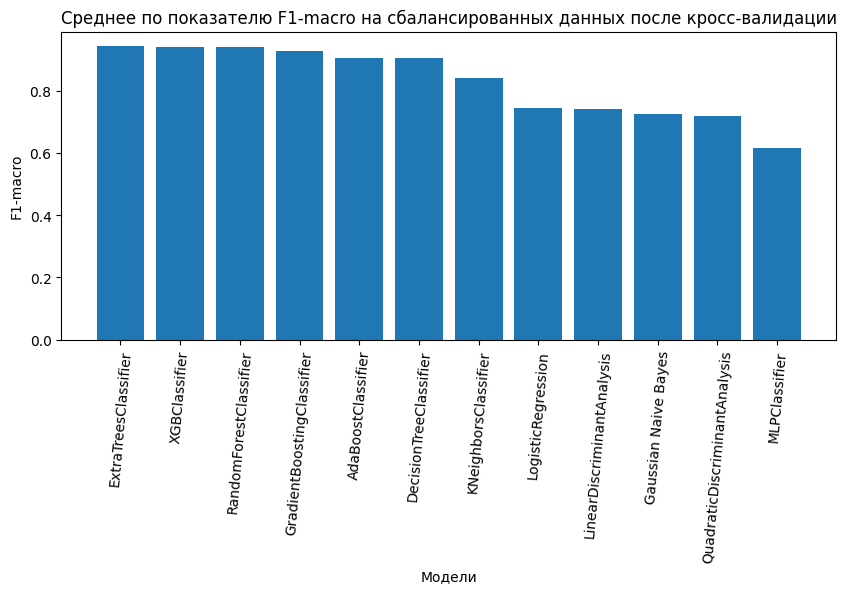

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(Smote_Cross_Val.index, Smote_Cross_Val['f1_macro'])
plt.title("Среднее по показателю F1-macro на сбалансированных данных после кросс-валидации")
plt.xlabel("Модели")
plt.ylabel("F1-macro")
plt.xticks(rotation=85)
plt.show()

In [ ]:
Smote_Val, RandomUnderSampler_Val, ADASYN_Val

(                               f1_macro
 QuadraticDiscriminantAnalysis  0.705121
 GradientBoostingClassifier     0.687046
 AdaBoostClassifier             0.686745
 RandomForestClassifier         0.681697
 XGBClassifier                  0.677513
 ExtraTreesClassifier           0.675103
 Gaussian Naive Bayes           0.670728
 LogisticRegression             0.656766
 MLPClassifier                  0.652589
 LinearDiscriminantAnalysis     0.652408
 DecisionTreeClassifier         0.624056
 KNeighborsClassifier           0.590733,
                                f1_macro
 QuadraticDiscriminantAnalysis  0.700850
 GradientBoostingClassifier     0.685562
 AdaBoostClassifier             0.674643
 Gaussian Naive Bayes           0.673188
 LinearDiscriminantAnalysis     0.643087
 LogisticRegression             0.641755
 RandomForestClassifier         0.632129
 XGBClassifier                  0.622663
 ExtraTreesClassifier           0.614347
 MLPClassifier                  0.599695
 KNeighborsClas

In [ ]:
res = pd.concat([pd.DataFrame(Smote_Val_mean), pd.DataFrame(RandomUnderSampler_Val_mean), pd.DataFrame(ADASYN_Val_mean)])
res = res.reset_index()
res = res.rename(index={ 0:'Smote_Val_mean',1:'RandomUnderSampler_Val_mean',2:'ADASYN_Val_mean'})
res = res.drop(['index'], axis=1)
res.sort_values(by='f1_macro', ascending=False)

,f1_macro
Smote_Val_mean,0.663376
ADASYN_Val_mean,0.652536
RandomUnderSampler_Val_mean,0.632273


In [ ]:
res = pd.concat([pd.DataFrame(Smote_Cross_Val_mean), pd.DataFrame(RandomUnderSampler_Cross_Val_mean), pd.DataFrame(ADASYN_Cross_Val_mean)])
res = res.reset_index()
res = res.rename(index={ 0:'Smote_Cross_Val_mean',1:'RandomUnderSampler_Cross_Val_mean',2:'ADASYN_Cross_Val_mean'})
res = res.drop(['index'], axis=1)
res.sort_values(by='f1_macro', ascending=False)

,f1_macro,std
Smote_Cross_Val_mean,0.822694,0.015536
ADASYN_Cross_Val_mean,0.799936,0.015495
RandomUnderSampler_Cross_Val_mean,0.709100,0.024546


In [ ]:
data = pd.DataFrame({'Модель': ['Smote','ADASYN','RandomUnderSampler'],
              'Среднее F1_macro': [0.66,0.65,0.63]})
data

,Модель,Среднее F1_macro
0,Smote,0.66
1,ADASYN,0.65
2,RandomUnderSampler,0.63


#Other

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Machine Learning/')
pd.set_option('display.max_columns', None)
df = pd.read_csv('bank-additional-full.csv', sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['pdays'] = np.where(df['pdays']!=999, 1, 0)
X = df.drop(['y', 'duration', 'default'], axis=1)
Y = df['y']

X_train_0, X_test, Y_train_0, Y_test = train_test_split(X, Y, stratify = Y,test_size = 0.15, random_state= 7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_0, Y_train_0, stratify = Y_train_0, test_size = 0.15, random_state= 7)
print(f'DF{X.shape} = Train {X_train_0.shape} Test {X_test.shape} Train {X_train.shape} Val {X_val.shape}')
print(f'DF{Y.shape} = Train {Y_train_0.shape} Test {Y_test.shape} Train {Y_train.shape} Val {Y_val.shape}')

encode_model = TargetEncoder().fit(X_train, Y_train)
X_train = encode_model.transform(X_train)
X_test = encode_model.transform(X_test)
X_val = encode_model.transform(X_val)

# from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE
# from imblearn.under_sampling import NeighbourhoodCleaningRule, AllKNN
# from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
# from imblearn.combine import SMOTEENN, SMOTETomek
# rus = SMOTEENN(sampling_strategy='auto')
# X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
# print(X_resampled.shape, y_resampled.shape)


X_resampled, y_resampled = ADASYN().fit_resample(X_train, Y_train)
print(X_resampled.shape, y_resampled.shape)


# model = StandardScaler()
# model = model.fit(X_resampled)
# X_resampled_SCL = model.transform(X_resampled)
# X_val_SCL = model.transform(X_val)

In [ ]:
Y_train.value_counts()

In [ ]:
y_resampled.value_counts()

In [ ]:
#если сделать рандомундерсамплер переобучения не будет
model = GradientBoostingClassifier( n_estimators=350, learning_rate=10,
#max_depth=5,  learning_rate=0.1, alpha=3000
# n_estimators=828, max_depth=8, gamma=9, min_child_weight=45,
# learning_rate=0.07, eta=0.16677122567187622,
# reg_lambda=1.4494909242467706, alpha=10.9340361535750408,
# scale_pos_weight=2.83847649031208,
# subsample=0.8206780785166058, colsample_bytree=0.4020387362540664, objective = 'binary:logistic', random_state=7

                      )
model.fit(X_resampled,y_resampled)
predictions_val = model.predict(X_val)
print(classification_report(Y_val, predictions_val))
print(confusion_matrix(Y_val, predictions_val))
#print(plot_importance(model))
predictions_train = model.predict(X_resampled)
print(classification_report(y_resampled, predictions_train))
print(confusion_matrix(y_resampled, predictions_train))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4660
           1       0.35      0.57      0.43       592

    accuracy                           0.83      5252
   macro avg       0.65      0.72      0.67      5252
weighted avg       0.87      0.83      0.85      5252

[[4039  621]
 [ 256  336]]
              precision    recall  f1-score   support

           0       0.68      0.87      0.76     26405
           1       0.82      0.59      0.69     26405

    accuracy                           0.73     52810
   macro avg       0.75      0.73      0.72     52810
weighted avg       0.75      0.73      0.72     52810

[[22906  3499]
 [10799 15606]]
